<a href="https://colab.research.google.com/github/tbonne/peds/blob/main/docs/introViz/IntroViz5_geoViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/geopandas_logo.png" width="500" alt="colab">
</p>

# <font color='darkorange'>Geo-Visualization</font>


In this notebook we will explore geo-visualization using:

- `GeoPandas`
- `matplotlib`
- `plotly.express`  

This notebook was largely built by Usman Alim (ualim@ucalgary.ca)

Let's load in the libraries that we'll need.

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

1.1.1


### GeoPandas

- Inherits from pandas. Provides the following two data structures: `GeoSeries` and `GeoDataFrame`.


- A `GeoSeries` is a `Series` where each entry describes a geometric shape in _vector_ format. The following shapes are supported:<br>
  - Points / Multi-points
  - Lines / Multi-lines
  - Polygons / Multi-polygons
  
  
- A `GeoDataFrame` is a `pandas` `DataFrame` with a special 'geometry' column that contains a `GeoSeries`.


- Provides methods to convert between different geospatial coordinate systems.


### <font color='darkorange'>Read GeoJSON Data</font>

GeoJSON is a commonly used format for storing data associated with regions defined through geographic coordinates.
In this notebook, we'll look at the Census by Community dataset for Calgary.

Download the dataset (in GeoJSON format) from the following URL:
[Census by Community 2019](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb)

In [ ]:
# Let's read the dataset through geopandas as a GeoDataFrame

census_file = '/content/Census_by_Community_2019_20250904.geojson' #you'll have to change this to your path!
cendf = gpd.read_file(census_file)
display(cendf.head())
display(type(cendf))

# There's a geometry column which holds the geometric information as a GeoSeries
display(type(cendf.geometry))

# It looks like the coordinates for the community polygons are in lat/long format.
# The projection can be setup appropriately.
# For further details on managing projections, see:
# https://geopandas.org/en/stable/docs/user_guide/projections.html
# cendf.geometry = cendf.geometry.set_crs(epsg=4326)
display(cendf.crs)

:id           :version                      :created_at  \
0  row-htch~ncmf-gwzn  rv-z5j2-9hi7~psmd 2019-09-03 15:59:17.026000+00:00   
1  row-zqyy_ju2s_c5re  rv-viwy.rrv7-q7yy 2019-09-03 15:59:17.026000+00:00   
2  row-wep2.prwp.49vn  rv-sx44-2u73-trw9 2019-09-03 15:59:17.026000+00:00   
3  row-7kr7-i99n~3iat  rv-3nz6.dycy-8sps 2019-09-03 15:59:17.026000+00:00   
4  row-btzw~jxbf.vcyg  rv-qmgj_uwrw_udpj 2019-09-03 15:59:17.026000+00:00   

                       :updated_at        class class_code comm_code  \
0 2019-09-03 15:59:17.026000+00:00  Residential        1.0       LEG   
1 2019-09-03 15:59:17.026000+00:00  Residential        1.0       HPK   
2 2019-09-03 15:59:17.026000+00:00  Residential        1.0       CNS   
3 2019-09-03 15:59:17.026000+00:00  Residential        1.0       MON   
4 2019-09-03 15:59:17.026000+00:00  Residential        1.0       TEM   

            name     sector         srg  ... other_5_14 other_15_19  \
0         LEGACY      SOUTH  DEVELOPING  ...          0           0   
1  HIGHLAND PARK     CENTRE   BUILT-OUT  ...          0           0   
2    CORNERSTONE  NORTHEAST  DEVELOPING  ...          0           0   
3     MONTGOMERY  NORTHWEST   BUILT-OUT  ...          0           0   
4         TEMPLE  NORTHEAST   BUILT-OUT  ...          0           0   

  other_20_24 other_25_34 other_35_44 other_45_54 other_55_64 other_65_74  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

  other_75                                           geometry  
0        0  MULTIPOLYGON (((-114.022 50.86308, -114.02137 ...  
1        0  MULTIPOLYGON (((-114.06916 51.09565, -114.0667...  
2        0  MULTIPOLYGON (((-113.9184 51.17607, -113.91667...  
3        0  MULTIPOLYGON (((-114.16458 51.08145, -114.1644...  
4        0  MULTIPOLYGON (((-113.93513 51.09608, -113.9351...  

[5 rows x 146 columns]

geopandas.geodataframe.GeoDataFrame

geopandas.geoseries.GeoSeries

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Let's index by community name
cendf.set_index('name', inplace=True)

# convert to world mercator which has units of meters
# https://epsg.io/3395

cendf.geometry = cendf.geometry.to_crs(epsg=3395)
display(cendf.head())
display(cendf.crs)

:id           :version  \
name                                                   
LEGACY         row-htch~ncmf-gwzn  rv-z5j2-9hi7~psmd   
HIGHLAND PARK  row-zqyy_ju2s_c5re  rv-viwy.rrv7-q7yy   
CORNERSTONE    row-wep2.prwp.49vn  rv-sx44-2u73-trw9   
MONTGOMERY     row-7kr7-i99n~3iat  rv-3nz6.dycy-8sps   
TEMPLE         row-btzw~jxbf.vcyg  rv-qmgj_uwrw_udpj   

                                   :created_at  \
name                                             
LEGACY        2019-09-03 15:59:17.026000+00:00   
HIGHLAND PARK 2019-09-03 15:59:17.026000+00:00   
CORNERSTONE   2019-09-03 15:59:17.026000+00:00   
MONTGOMERY    2019-09-03 15:59:17.026000+00:00   
TEMPLE        2019-09-03 15:59:17.026000+00:00   

                                   :updated_at        class class_code  \
name                                                                     
LEGACY        2019-09-03 15:59:17.026000+00:00  Residential        1.0   
HIGHLAND PARK 2019-09-03 15:59:17.026000+00:00  Residential        1.0   
CORNERSTONE   2019-09-03 15:59:17.026000+00:00  Residential        1.0   
MONTGOMERY    2019-09-03 15:59:17.026000+00:00  Residential        1.0   
TEMPLE        2019-09-03 15:59:17.026000+00:00  Residential        1.0   

              comm_code     sector         srg comm_structure  ... other_5_14  \
name                                                           ...              
LEGACY              LEG      SOUTH  DEVELOPING   BUILDING OUT  ...          0   
HIGHLAND PARK       HPK     CENTRE   BUILT-OUT          1950s  ...          0   
CORNERSTONE         CNS  NORTHEAST  DEVELOPING          2000s  ...          0   
MONTGOMERY          MON  NORTHWEST   BUILT-OUT          1950s  ...          0   
TEMPLE              TEM  NORTHEAST   BUILT-OUT    1960s/1970s  ...          0   

              other_15_19 other_20_24 other_25_34 other_35_44 other_45_54  \
name                                                                        
LEGACY                  0           0           0           0           0   
HIGHLAND PARK           0           0           0           0           0   
CORNERSTONE             0           0           0           0           0   
MONTGOMERY              0           0           0           0           0   
TEMPLE                  0           0           0           0           0   

              other_55_64 other_65_74 other_75  \
name                                             
LEGACY                  0           0        0   
HIGHLAND PARK           0           0        0   
CORNERSTONE             0           0        0   
MONTGOMERY              0           0        0   
TEMPLE                  0           0        0   

                                                        geometry  
name                                                              
LEGACY         MULTIPOLYGON (((-12692870.539 6563947.026, -12...  
HIGHLAND PARK  MULTIPOLYGON (((-12698121.105 6604958.485, -12...  
CORNERSTONE    MULTIPOLYGON (((-12681337.982 6619187.684, -12...  
MONTGOMERY     MULTIPOLYGON (((-12708742.821 6602449.075, -12...  
TEMPLE         MULTIPOLYGON (((-12683200.328 6605033.675, -12...  

[5 rows x 145 columns]

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

np.float64(2.2053937911987305)

### <font color='darkorange'>Plot GeoJSON Data</font>

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

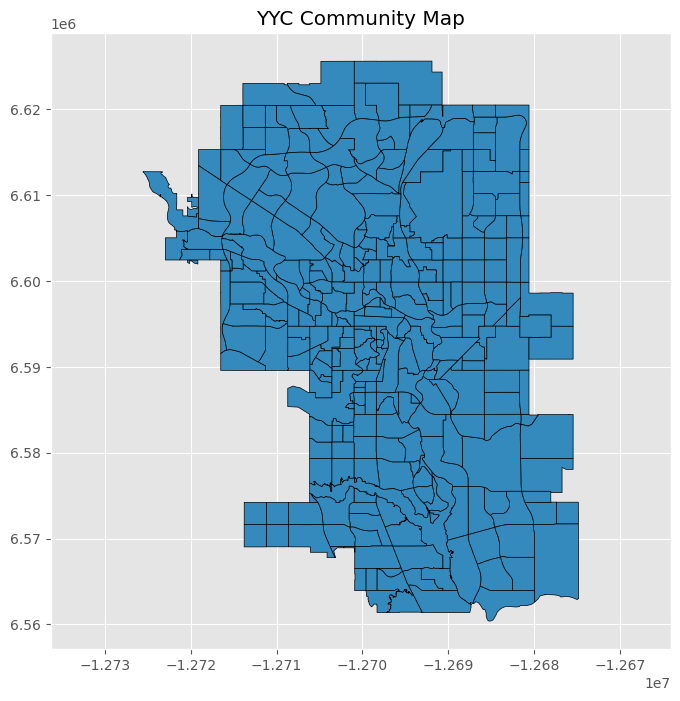

In [ ]:
# To visualize all the geometric entities, we can use the built-in plot command

fig = plt.figure()
axis = fig.add_subplot(1,1,1)

## The following can be used to control the map projection

## Play with projections.
## See https://geopandas.org/en/stable/docs/user_guide/projections.html

#cendf = cendf.to_crs(epsg=4326) # for lat/long
cendf = cendf.to_crs(epsg=3395) # for mercator
display(cendf.crs)


#use the built in plot function!
cendf.plot(ax=axis, edgecolor='black')

#add details to the plot
plt.axis('equal')
plt.title('YYC Community Map')
fig.set_size_inches(8,8)




<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Try out the above with the lat/long projection (comment out the mercator)

Now let's look at how we can plot individual polygons.

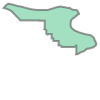

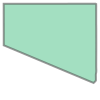

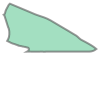

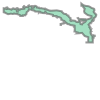

In [ ]:
# If we select a particular geometry cell, Jupyter will display it
display(cendf.loc['INGLEWOOD','geometry'], cendf.loc['ROCKY RIDGE', 'geometry'],
        cendf.loc['VARSITY', 'geometry'], cendf.loc['FISH CREEK PARK','geometry'])






In [ ]:
# Basic methods to compute areas and bounds are also provided.
cendf['geometry'].area

name
LEGACY           1.520236e+07
HIGHLAND PARK    3.458921e+06
CORNERSTONE      1.946280e+07
MONTGOMERY       7.447214e+06
TEMPLE           6.627375e+06
                     ...     
01H              6.392377e+06
HIDDEN VALLEY    1.089955e+07
RIVERBEND        1.025391e+07
RIDEAU PARK      6.725070e+05
FRANKLIN         3.693037e+06
Length: 306, dtype: float64

We can even calculate the distance between polygons.

In [ ]:
# Euclidean distance to Downtown for all the communities (based on centroid distances)
cendf['geometry'].distance(cendf.loc['DOWNTOWN COMMERCIAL CORE', 'geometry'])

name
LEGACY           31262.067942
HIGHLAND PARK     5466.599895
CORNERSTONE      20072.336484
MONTGOMERY        7638.984567
TEMPLE           12217.765229
                     ...     
01H              21758.631205
HIDDEN VALLEY    16329.269991
RIVERBEND        10578.986360
RIDEAU PARK       2705.694986
FRANKLIN          6919.843891
Length: 306, dtype: float64

### <font color='darkorange'>Choropleth mapping</font>

When we want to visualize how a value changes between polugons it is often useful to build a choropleth map. In these maps we colour code the polygons by a variable value. Let's take a look below.

First let's install a library that colab is missing.

In [ ]:
# Have to install a new library to color code polygons
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 16.4 MB/s eta 0:00:00


We can then specify a column from the GeoDataFrame.

In [ ]:
cendf['res_cnt'] = cendf['res_cnt'].astype(float).astype(int) # convert to an integer
cendf['res_cnt'].describe()




count      306.000000
mean      4193.388889
std       5046.790123
min          0.000000
25%          0.000000
50%       2363.000000
75%       6897.250000
max      25710.000000
Name: res_cnt, dtype: float64

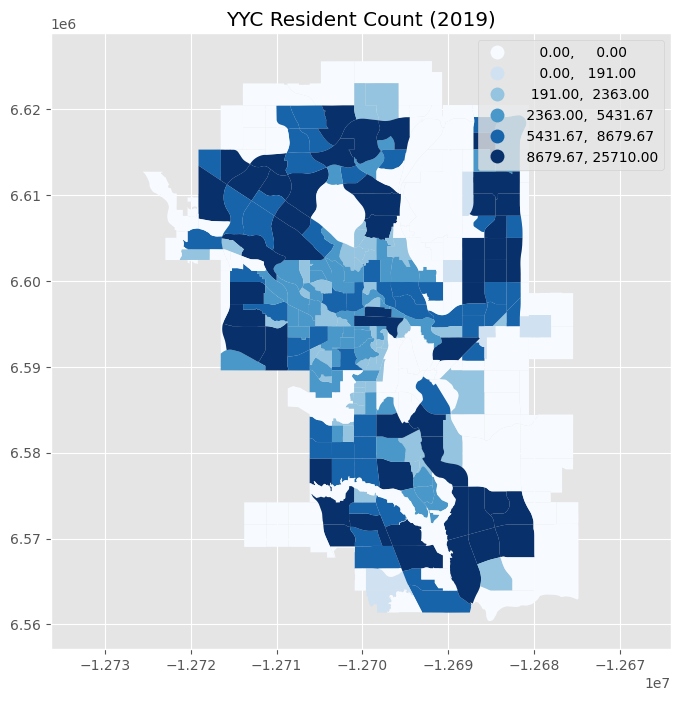

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1,1,1)

cendf.plot(ax=axis, column='res_cnt', scheme='quantiles', k=6, cmap='Blues', legend=True)
plt.axis('equal')

plt.title('YYC Resident Count (2019)')
fig.set_size_inches(8,8)


<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>

Try setting scheme to 'equal_interval' and 'quantiles' these are different methods to classify polygons.

See if you can do the same with Edmonton! You should be able to download the geojson file here: https://data.edmonton.ca/City-Administration/City-of-Edmonton-Neighbourhoods/65fr-66s6/

### <font color='darkorange'>Adding a scatterplot on a map</font>

- We can also plot points (given in geographic coordinates) on a base map.
- Let's display micromobility locations on YYC base map (i.e., locations of rentable e-bikes or scooters)
- Download the dataset from the following URL (for offline use):
  [Micromobility Locations](https://data.calgary.ca/Transportation-Transit/Micromobility-Locations-in-Calgary/a3ya-gwgt)
  
  There is also a live feed which at the time of writing this notebook is accessible through the following URL:
  https://data.calgary.ca/resource/8mci-3bzr.csv

In [ ]:
## First extract the lat / long of each e-bike/scooter

# Let's use the live feed
mm_location_file = "https://data.calgary.ca/resource/8mci-3bzr.csv"
mmlocs = pd.read_csv(mm_location_file,usecols=["timestamp","latitude", "longitude"], parse_dates=['timestamp'])

from shapely.geometry import Point

mmlocs['coordinates'] = list(zip(mmlocs["longitude"], mmlocs["latitude"]))
mmlocs['coordinates'] = mmlocs['coordinates'].apply(Point)
locsdf = gpd.GeoDataFrame(mmlocs, geometry='coordinates')
locsdf = locsdf.set_crs(epsg=4326) # interpret the coordinates as lat/long

display(locsdf.head())
display(locsdf.dtypes)

timestamp   latitude   longitude                  coordinates
0 2025-09-04 14:29:48  51.058924 -114.056105   POINT (-114.0561 51.05892)
1 2025-09-04 14:30:03  51.037710 -114.079560  POINT (-114.07956 51.03771)
2 2025-09-04 14:29:48  51.053198 -114.078323   POINT (-114.07832 51.0532)
3 2025-09-04 14:30:03  51.043270 -114.066540  POINT (-114.06654 51.04327)
4 2025-09-04 14:30:03  51.042680 -114.081217  POINT (-114.08122 51.04268)

timestamp      datetime64[ns]
latitude              float64
longitude             float64
coordinates          geometry
dtype: object

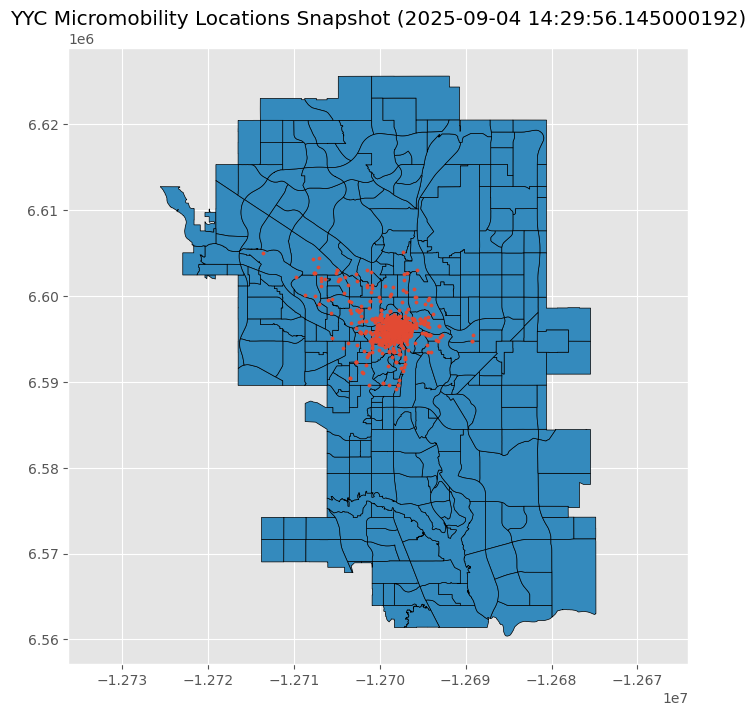

In [ ]:
# Now plot over the base YYC map

fig = plt.figure()
axis = fig.add_subplot(1,1,1)

# set the projection to mercator
cendf = cendf.to_crs(epsg=3395) #3395 for mercator
locsdf = locsdf.to_crs(epsg=3395)

cendf.plot(ax=axis, edgecolor='black')
locsdf.plot(ax=axis, markersize=5)


plt.axis('equal')
plt.title('YYC Micromobility Locations Snapshot (' + str(locsdf['timestamp'].mean()) + ')')
fig.set_size_inches(8,8)

<p align="left">
  <img src="https://raw.githubusercontent.com/tbonne/peds/main/images/take_action.jpg" width="100" alt="colab">
</p>


See if you can do the same for Edmonton again! Below is some code for the micromobility data in Edmonton, just to get you started.



In [ ]:
csv_url = "https://data.edmonton.ca/resource/vq44-ni9f.csv"
df = pd.read_csv(csv_url)
print(df.head())

                                      row_id vendor vehicle_type  \
0  Bird-a5277fe2-07d8-42c0-b098-363c15b7a31a   Bird      scooter   
1  Lime-71b54a75-4e4b-4235-8c4d-a343e014aaa1   Lime      scooter   
2  Lime-990ee7c5-6f02-428a-b14f-d684a8402952   Lime      scooter   
3  Lime-c5d4ce81-1aed-476a-b95d-c09ba8a5bdc0   Lime       e-bike   
4  Bird-5d782127-ecbf-46e4-85cd-0cea83fe529a   Bird      scooter   

                            instance_id                timestamp  \
0  a5277fe2-07d8-42c0-b098-363c15b7a31a  2025-09-04T14:43:59.000   
1  71b54a75-4e4b-4235-8c4d-a343e014aaa1  2025-09-04T14:45:02.000   
2  990ee7c5-6f02-428a-b14f-d684a8402952  2025-09-04T14:45:02.000   
3  c5d4ce81-1aed-476a-b95d-c09ba8a5bdc0  2025-09-04T14:45:02.000   
4  5d782127-ecbf-46e4-85cd-0cea83fe529a  2025-09-04T14:43:59.000   

   epoch_timestamp  is_reserved_flag  is_disabled_flag   latitude   longitude  \
0       1757018639                 0                 0  53.539275 -113.510190   
1       1757018702  

### <font color='darkorange'>Mapping in Plotly</font>

- Matplotlib maps are good for offline use, lack interactivity.

- Plotly uses _tiled maps_ provided by mapbox as the underlying interactive base maps.
  - Some mapbox base maps require an [access token](https://docs.mapbox.com/help/getting-started/access-tokens/) but there are also free ones.
  - Untiled (outline) maps are also supported.
- We'll look at the following examples that work with geopandas dataframes:
  - [px.scatter_mapbox()](https://plotly.com/python/scattermapbox/)
  - [px.choropleth_mapbox()](https://plotly.com/python/mapbox-county-choropleth/)

In [ ]:
# Micromobility locations via px.scatter_mapbox()

locsdf = locsdf.to_crs(epsg=4326)
fig = px.scatter_mapbox(locsdf,
                        lat=locsdf.geometry.y,
                        lon=locsdf.geometry.x,
                        hover_name="timestamp",
                        center={"lat": 51.0486, "lon": -114.0708}, # Calgary
                        mapbox_style='open-street-map',
                        zoom=9,
                        title='YYC Micromobility Locations Snapshot (' + str(locsdf['timestamp'].mean()) + ')')

fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50},
                  autosize=True,
                  height=600 )
fig.show()

In [ ]:
# Choropleth map of calgary resident count via px.choropleth_mapbox()

cendf = cendf.to_crs(epsg=4326)

# Need to be careful with the options or you'll end up with just the base map
fig = px.choropleth_mapbox(cendf, geojson=cendf,
                           locations=cendf.index,
                           color="res_cnt",
                           color_continuous_scale = 'YlGn',
                           center={"lat": 51.0486, "lon": -114.0708}, # Calgary
                           mapbox_style="carto-positron",
                           opacity=0.5,
                           zoom=9,
                           title = 'YYC Resident Count (2019)')

fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50},
                  autosize=True,
                  height=600 )
fig.show()


### <font color='darkorange'>Search for your own geo-datastes</font>

Download reef data:

https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-reefs/

Download country data:

https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/



   scalerank featurecla  min_zoom  \
0          6      Reefs       5.0   
1          6      Reefs       5.0   
2          6      Reefs       5.0   
3          6      Reefs       5.0   
4          6      Reefs       5.0   

                                            geometry  
0  LINESTRING (-170.61214 25.48105, -170.58137 25...  
1  LINESTRING (-166.26731 23.87844, -166.22592 23...  
2  LINESTRING (-175.79301 27.77699, -175.73537 27...  
3  LINESTRING (-175.87081 27.78916, -175.90176 27...  
4  LINESTRING (-177.34847 28.18787, -177.32033 28...  
EPSG:4326


<Axes: >

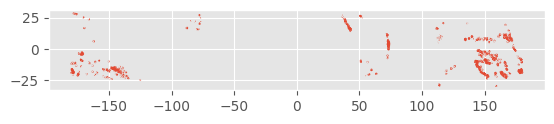

In [ ]:
import geopandas as gpd
import requests
import zipfile
import io

#import the data into a geopandas object
reefs = gpd.read_file("/content/ne_10m_reefs.zip")

print(reefs.head())
print(reefs.crs)  # check the coordinate reference system
reefs.plot()


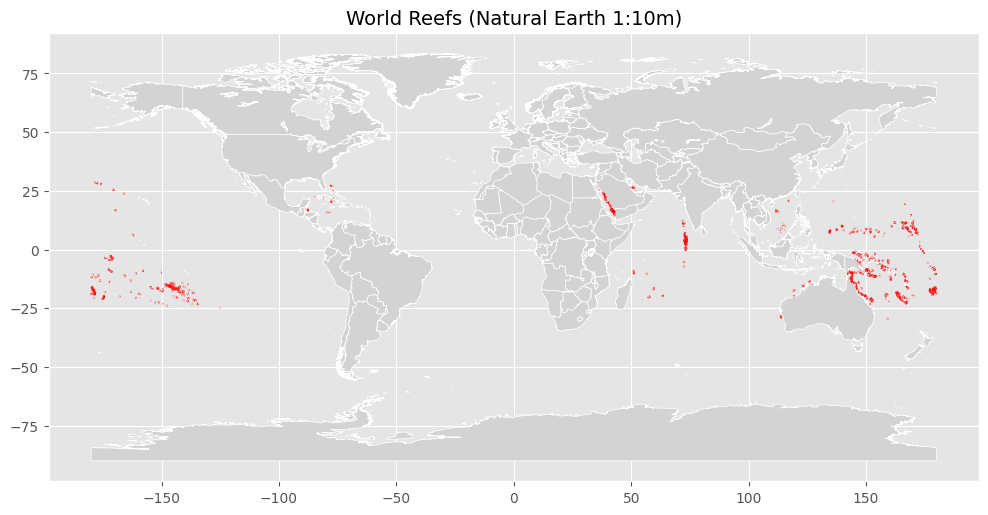

In [ ]:
# Load a world background (built into GeoPandas: naturalearth_lowres)
world = gpd.read_file("/content/ne_10m_admin_0_countries_lakes.zip")

# Make sure both are in the same CRS (coordinate reference system)
reefs = reefs.to_crs(world.crs)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(ax=ax, color="lightgrey", edgecolor="white")
reefs.plot(ax=ax, color="red", markersize=1, alpha=0.7)

ax.set_title("World Reefs (Natural Earth 1:10m)", fontsize=14)
plt.show()

Feel free to try this again. Go to www.naturalearthdata.com/ and in the search bar, search for some spatial data that might be of interest to you!

E.g., Antarctic ice shelves, antarctic boundaries, protected areas, etc...

### <font color='darkorange'>Further reading</font>

In this notebook, we've explored libraries that support geographic data visualization. In particular, we've looked at [GeoPandas](http://geopandas.org/) and its integration with [matplotlib](http://geopandas.org/mapping.html).

[Plotly](https://plot.ly/python/maps/) supports interactive geo-visualization capabilities on top of base maps provided by [mapbox](https://www.mapbox.com/).